In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [6]:
#In this project we will  predict if a person is suffering from parkinsons disease based on audio/voice measures

In [22]:
#description
file = open("ParkinsonNames.txt",mode="r")
for i in file.readlines():
    print(i)

Title: Parkinsons Disease Data Set



Abstract: Oxford Parkinson's Disease Detection Dataset



-----------------------------------------------------	



Data Set Characteristics: Multivariate

Number of Instances: 197

Area: Life

Attribute Characteristics: Real

Number of Attributes: 23

Date Donated: 2008-06-26

Associated Tasks: Classification

Missing Values? N/A



-----------------------------------------------------	



Source:



The dataset was created by Max Little of the University of Oxford, in 

collaboration with the National Centre for Voice and Speech, Denver, 

Colorado, who recorded the speech signals. The original study published the 

feature extraction methods for general voice disorders.



-----------------------------------------------------



Data Set Information:



This dataset is composed of a range of biomedical voice measurements from 

31 people, 23 with Parkinson's disease (PD). Each column in the table is a 

particular voice measure, and each row cor

In [4]:
df = pd.read_csv("parkinsons.data")

In [5]:
df


,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [25]:
df.isnull().sum() #there are no null values

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [26]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [27]:
df["status"]# 0 for healthy and 1 for Parkinsons Disease

0      1
1      1
2      1
3      1
4      1
      ..
190    0
191    0
192    0
193    0
194    0
Name: status, Length: 195, dtype: int64

C:\Users\UMAIR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='status', ylabel='count'>

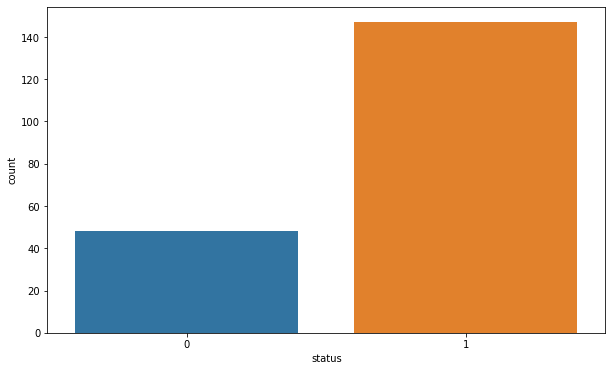

In [31]:
plt.figure(figsize=(10,6))
sns.countplot(df["status"])

<AxesSubplot:xlabel='status', ylabel='NHR'>

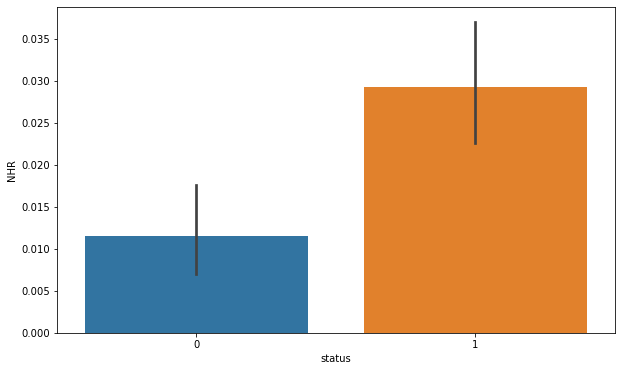

In [32]:
plt.figure(figsize=(10,6))
sns.barplot(x="status",y="NHR",data=df) #NHR-ratio of noise to tonal components in the voice

<AxesSubplot:xlabel='status', ylabel='HNR'>

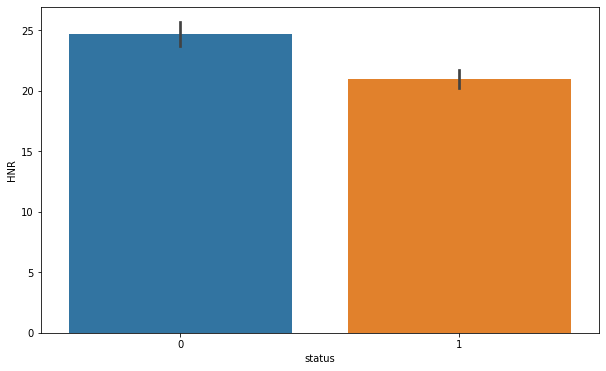

In [33]:
plt.figure(figsize=(10,6))
sns.barplot(x="status",y="HNR",data=df) #HNR-ratio of noise to tonal components in the voice

<AxesSubplot:xlabel='status', ylabel='RPDE'>

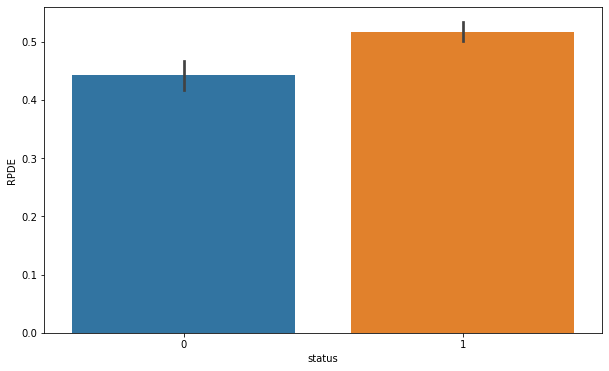

In [34]:
plt.figure(figsize=(10,6))
sns.barplot(x="status",y="RPDE",data=df) #nonlinear dynamical complexity measures

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

C:\Users\UMAIR\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\UMAIR\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\UMAIR\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

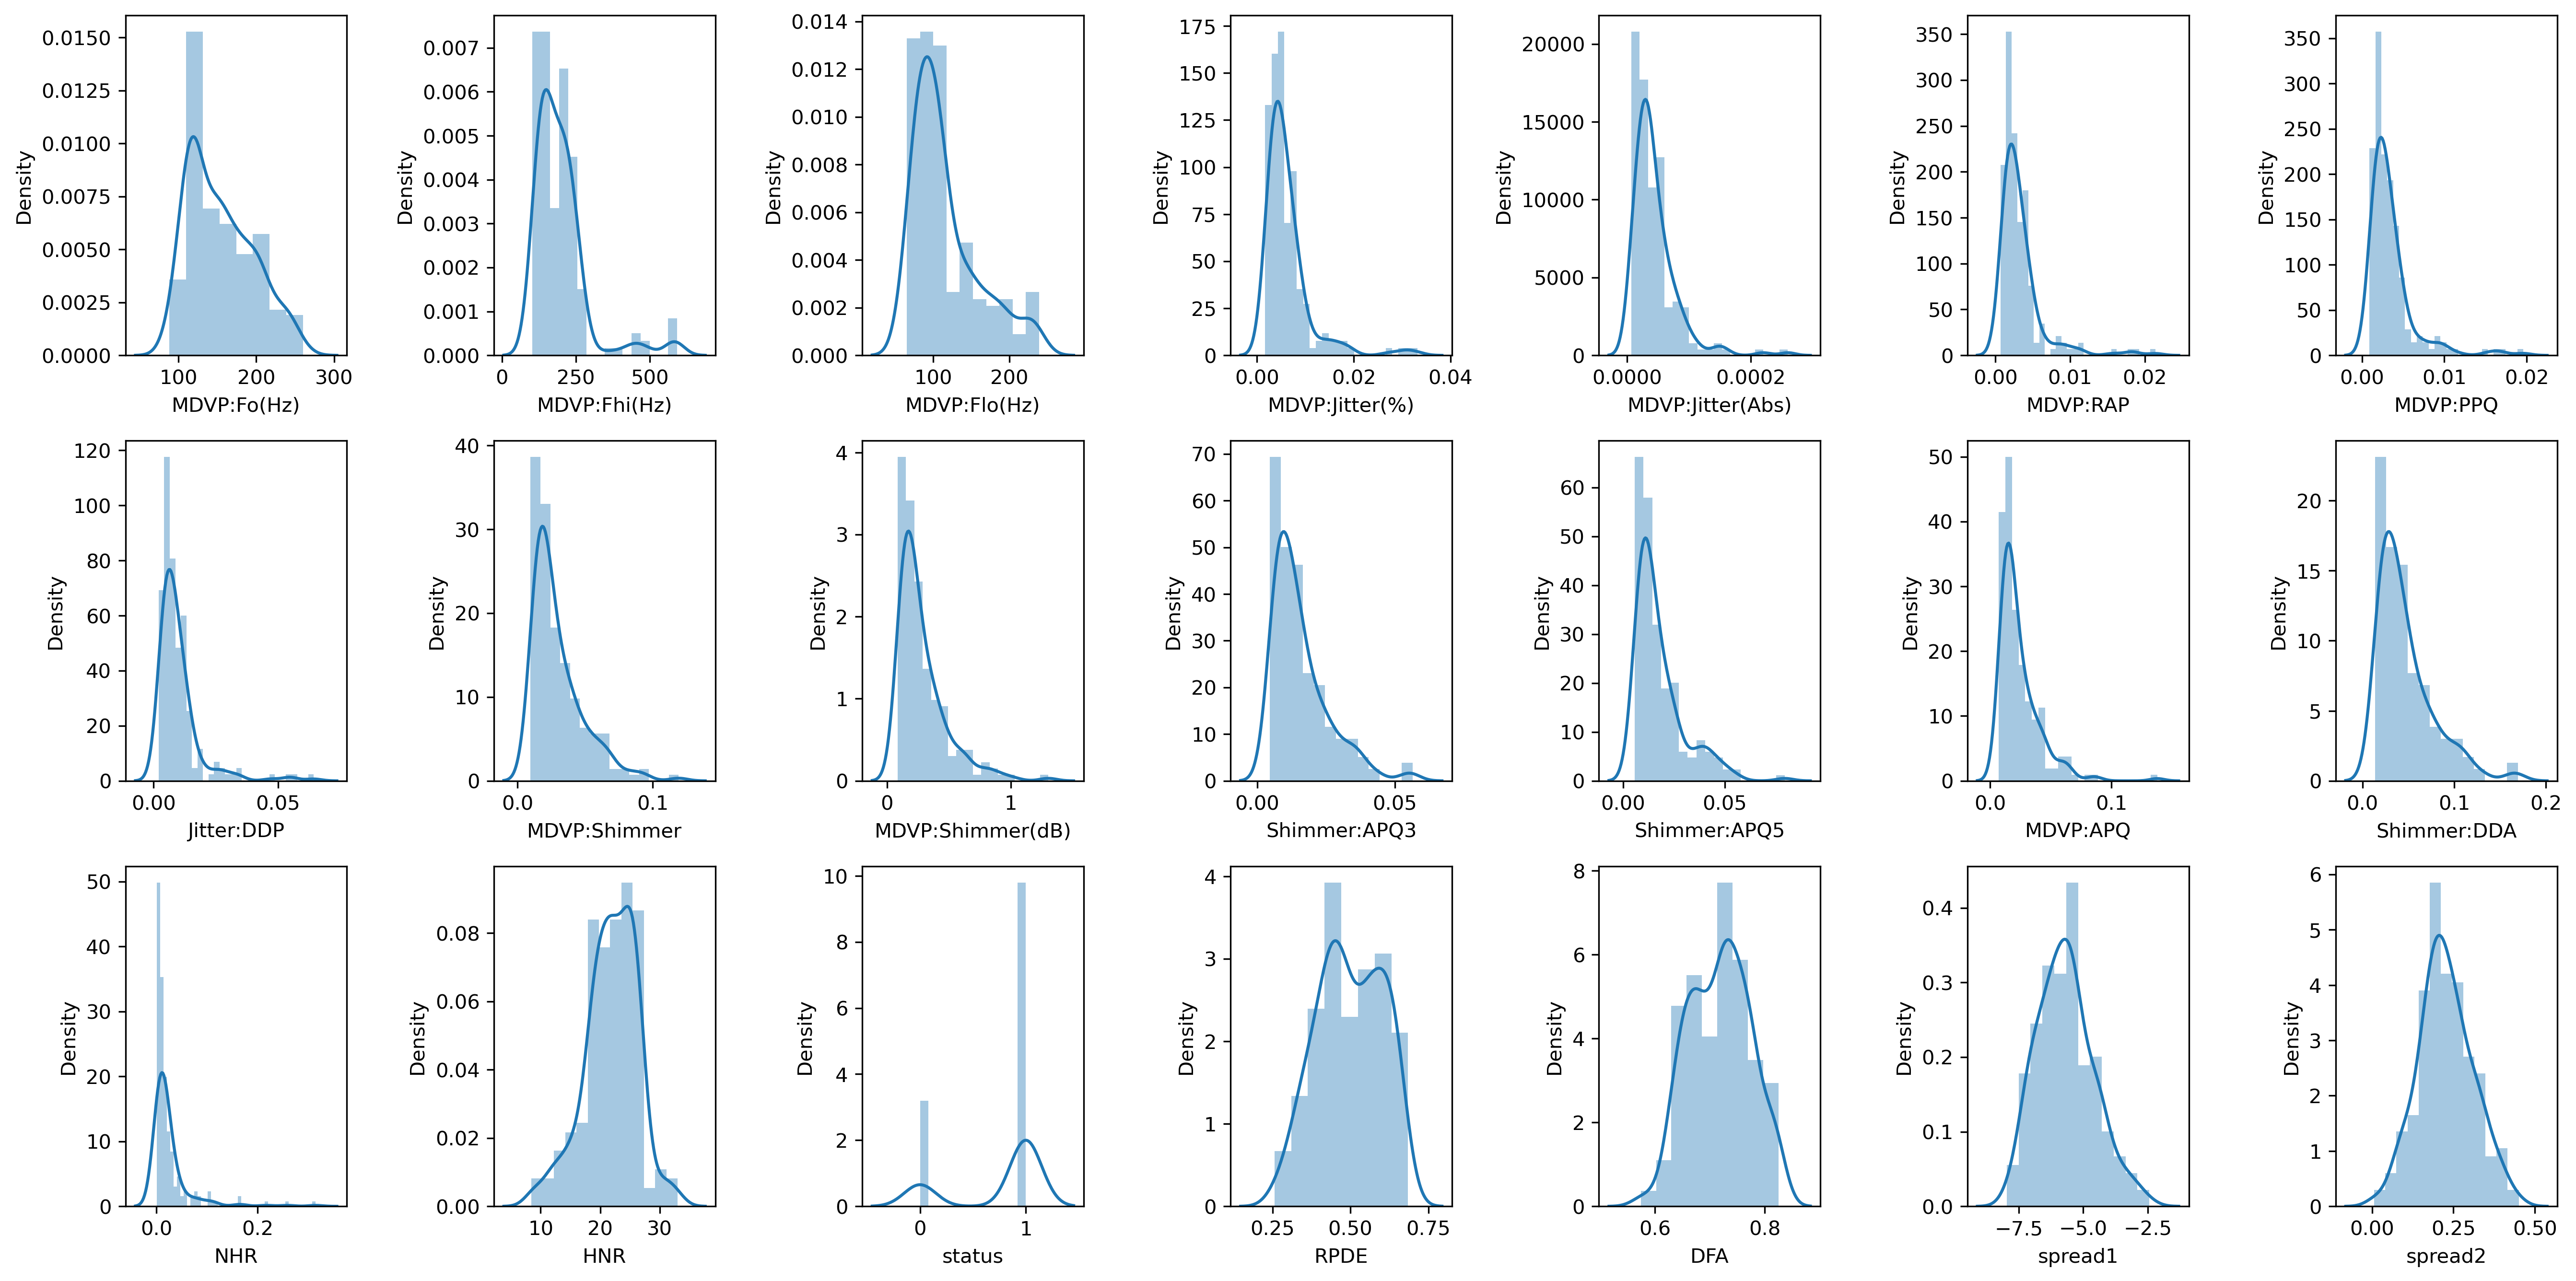

In [43]:
fig,ax = plt.subplots(nrows=3,ncols=7,figsize=(18,9),dpi=300)
col = df.columns

index = 1

for i in range(3):
    for j in range(7):
        sns.distplot(df[col[index]],ax=ax[i][j])
        index +=1
plt.tight_layout()

In [44]:
df = df.drop("name",axis=1)

In [45]:
df

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,0.405,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,0.263,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,0.256,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,0.241,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [46]:
X = df.drop("status",axis=1)
y = df["status"]

In [92]:
X

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,0.405,...,0.02745,0.07008,0.02764,19.517,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,0.263,...,0.01879,0.04812,0.01810,19.147,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,0.256,...,0.01667,0.03804,0.10715,17.883,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,0.241,...,0.01588,0.03794,0.07223,19.020,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [88]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=40)

In [89]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,plot_confusion_matrix

## Logistic Regression

In [90]:
LR = LogisticRegression()

In [91]:
LR.fit(X_train,y_train)

C:\Users\UMAIR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [84]:
#Train prediction
train_pred = LR.predict(X_train)
accuracy_score(y_train,train_pred)

0.8717948717948718

In [95]:
#Testing prediction
test_pred = LR.predict(X_test)
accuracy_score(y_test,test_pred)

0.8717948717948718

In [101]:
#Confusion matrix for Train 
confusion_matrix(y_train,train_pred) 

array([[ 25,  15],
       [  5, 111]], dtype=int64)

In [102]:
#Confusion matrix for Train 
confusion_matrix(y_test,test_pred)

array([[ 5,  3],
       [ 2, 29]], dtype=int64)

In [103]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier()
RF.fit(X_train,y_train)

RandomForestClassifier()

In [104]:
#Train prediction
train_pred = RF.predict(X_train)
accuracy_score(y_train,train_pred)

1.0

In [105]:
#Testing prediction
test_pred = RF.predict(X_test)
accuracy_score(y_test,test_pred)

0.9230769230769231

In [106]:
confusion_matrix(y_train,train_pred) 

array([[ 40,   0],
       [  0, 116]], dtype=int64)

In [107]:
confusion_matrix(y_test,test_pred)

array([[ 6,  2],
       [ 1, 30]], dtype=int64)

In [127]:
print((y_test != test_pred).sum(),"/ ", (y_test == test_pred).sum() + (y_train != train_pred).sum() )

3 /  36


In [128]:
from sklearn.metrics import cohen_kappa_score
# Cohen's Kappa is a statistical measure that is used to measure the reliability of two raters who are rating the same quantity and identifies  

In [129]:
cohen_kappa_score(y_test,test_pred)

0.7526427061310782

In [181]:
#comparing predicted and actual values
new = pd.DataFrame(data=test_pred).reset_index()
new1 = new[0]
new2 = pd.DataFrame(data=y_test).reset_index()["status"]
pd.DataFrame(data=[new1,new2],index=["Predicted","Actual"]).T

,Predicted,Actual
0,1,1
1,1,1
2,1,1
3,0,0
4,1,1
5,1,0
6,1,1
7,1,1
8,1,1
9,1,0


In [182]:
#Random Forest has performed well as compare to the Logistic regression

### Decision Tree

In [183]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [184]:
DT = DecisionTreeClassifier()

In [185]:
DT.fit(X_train,y_train)

DecisionTreeClassifier()

In [186]:
#Train prediction
train_pred = DT.predict(X_train)
accuracy_score(y_train,train_pred)

1.0

In [187]:
#Testing prediction
test_pred = DT.predict(X_test)
accuracy_score(y_test,test_pred)

0.8717948717948718

In [188]:
confusion_matrix(y_train,train_pred) 

array([[ 40,   0],
       [  0, 116]], dtype=int64)

In [189]:
confusion_matrix(y_test,test_pred) 

array([[ 7,  1],
       [ 4, 27]], dtype=int64)

In [190]:
cohen_kappa_score(y_test,test_pred)

0.654867256637168

## Naive Bayes

In [191]:
NB = GaussianNB()
NB.fit(X_train,y_train)

GaussianNB()

In [195]:
#Train prediction
train_pred = NB.predict(X_train)
print("Train Score : ",accuracy_score(y_train,train_pred))
#Testing prediction
test_pred = NB.predict(X_test)
print("Test Score : ",accuracy_score(y_test,test_pred))

Train Score :  0.7307692307692307
Test Score :  0.6923076923076923


In [197]:
confusion_matrix(y_train,train_pred) #train

array([[38,  2],
       [40, 76]], dtype=int64)

In [196]:
confusion_matrix(y_test,test_pred)  #test

array([[ 8,  0],
       [12, 19]], dtype=int64)

In [198]:
cohen_kappa_score(y_test,test_pred)  #score


0.3937823834196892

In [199]:
print((y_test != test_pred).sum(),"/ ", (y_test == test_pred).sum() + (y_train != train_pred).sum() )

12 /  69


In [200]:
#It is not performing good as compare to other algorithms

## K-neareast neighbour

In [201]:
KNN = KNeighborsClassifier()
KNN.fit(X_train,y_train)

KNeighborsClassifier()

In [202]:
#Train prediction
train_pred = KNN.predict(X_train)
print("Train Score : ",accuracy_score(y_train,train_pred))
#Testing prediction
test_pred = KNN.predict(X_test)
print("Test Score : ",accuracy_score(y_test,test_pred))

Train Score :  0.9102564102564102
Test Score :  0.8461538461538461


In [203]:
confusion_matrix(y_train,train_pred) #train

array([[ 30,  10],
       [  4, 112]], dtype=int64)

In [204]:
confusion_matrix(y_test,test_pred)  #test

array([[ 4,  4],
       [ 2, 29]], dtype=int64)

In [205]:
#it is giving good score as compare to Naive bayes but still Random forest performance is good

In [206]:
print((y_test != test_pred).sum(),"/ ", (y_test == test_pred).sum() + (y_train != train_pred).sum() )

6 /  47


## Support Vector Machine

In [207]:
SVM = SVC(kernel="linear")
SVM.fit(X_train,y_train)

SVC(kernel='linear')

In [208]:
#Train prediction
train_pred = SVM.predict(X_train)
print("Train Score : ",accuracy_score(y_train,train_pred))
#Testing prediction
test_pred = SVM.predict(X_test)
print("Test Score : ",accuracy_score(y_test,test_pred))

Train Score :  0.8782051282051282
Test Score :  0.8974358974358975


In [209]:
confusion_matrix(y_train,train_pred) #train

array([[ 23,  17],
       [  2, 114]], dtype=int64)

In [210]:
confusion_matrix(y_test,test_pred)  #test

array([[ 5,  3],
       [ 1, 30]], dtype=int64)

In [211]:
print((y_test != test_pred).sum(),"/ ", (y_test == test_pred).sum() + (y_train != train_pred).sum() )

4 /  54


In [212]:
metrics.recall_score(y_test,test_pred) #recall 

<IPython.core.display.Javascript object>

0.967741935483871

In [213]:
cohen_kappa_score(y_test,test_pred)  #score

0.6533333333333333

In [214]:
#SVM performs well as the score is closer to the random forest